# Fourier Approximation

## Euler Fourier Forumula
$$f(x) = \dfrac{a_o}{2} + \sum_{n=1}^{\infty} a_n \cos (\dfrac{n\pi x}{L}) + b_n \sin (\dfrac{n \pi x}{L})$$

## Importing Libraries

We will use scipy to solve intergation. Let's import necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Defining Function

Consider a function defined as,
$$ f(x) = \begin{cases} 
0 & \text{if } -3 \leq x < 0 \\
x^2(3-x) & \text{if } 0 < x < 3 \\
f(x+6) = f(x)
\end{cases}
$$

Now let's define it in terms of python function.

In [7]:
L = 6
def f(x):
    x_mod = x % L

    # Define the piecewise function using np.where
    return np.where(
        (-3 <= x_mod) & (x_mod <= 0), 
        0, 
        np.where((0 < x_mod) & (x_mod < 3), x_mod**2 *(3 - x_mod), 0)
    )

Since, we defined our function. Let's calculate constant coefficiencts in fourier series, which are given as;
$$
\begin{align}
a_o &= \dfrac{1}{L}\int_{-L/2}^{L/2} f(x)dx\\[20pt]
a_n &= \dfrac{2}{L}\int_{-L/2}^{L/2} f(x)\cos(\dfrac{2 \pi n x}{L})dx\\[20pt]
b_n &= \dfrac{2}{L}\int_{-L/2}^{L/2} f(x)\sin(\dfrac{2 \pi n x}{L})dx\\[20pt]
\end{align}
$$
Let us implemet these function in a python code.

In [13]:
a0 =  (1/L) * (quad(lambda x: 0, -3, 0)[0] + quad(lambda x : x**2*(3-x),0,3)[0])
def an(n):
    result = (2/L) * (quad(lambda x: 0 * np.cos(2 * np.pi * n * x / L), 0, -3)[0] + 
                      quad(lambda x: x**2*(3-x)*np.cos(2 * np.pi * n * x / L),0,3)[0])
    return result
def bn(n):
    result = (2/L) * (quad(lambda x: 0 * np.sin(2 * np.pi * n * x / L), 0, -3)[0] + 
                      quad(lambda x: x**2*(3-x)*np.sin(2 * np.pi * n * x / L),0,3)[0])
    return result

Hence the final fourier series solution.

In [14]:
def fourier_series(x,n_terms):
    result = a0/2
    for n in range (1, n_terms + 1):
        result += an(n)* np.cos(2*np.pi*n*x /L) + bn(n) * np.sin(2*np.pi*n*x /L)
    return result

All that remains is to plot the result. We go easy on it.

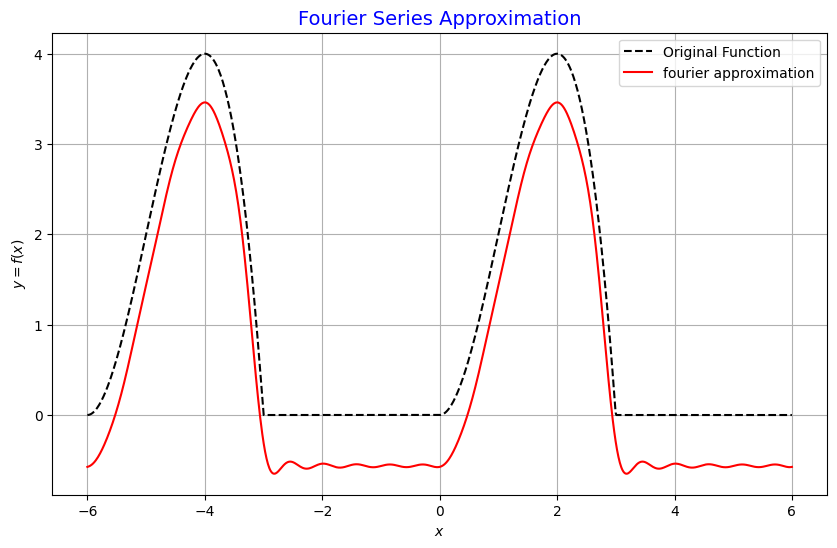

In [26]:
x = np.linspace(-6,6,1000)
n_terms = 10

plt.figure(figsize=(10,6))
plt.title("Fourier Series Approximation",color='blue',fontsize="14")
plt.plot(x, f(x), label='Original Function', color='black', linestyle='--')
plt.plot(x, fourier_series(x,n_terms),label='fourier approximation',color='red')
plt.xlabel('$x$')
plt.ylabel("$y=f(x)$")
plt.legend()
plt.grid(True)
plt.show()

Let's try another example.

Consider a function defined as,
$$ f(x) = \begin{cases} 
x + 2 & \text{if } -2 \leq x < 0 \\
2 - 2x & \text{if } 0 \leq x < 2 \\
f(x+4) = f(x)
\end{cases}
$$

In [20]:
P = 4
def g(x):
    x_mod = x%P
    return np.where(
            (-2 <= x_mod)&(x_mod < 0),x_mod+2,
            np.where((0<= x_mod)&(x_mod < 2),2-2*x_mod,0)
            )

Define constants.

In [41]:
a0 = (1/P)*(quad(lambda x : x +2, 0, -2)[0] + quad(lambda x : 2-(2*x), 0, 2)[0])

def an(n):
    result = (2/P)*(quad(lambda x : x+2 * np.cos(2*n*np.pi*x / P),0,-2)[0] + 
                    quad(lambda x : (2-2*x) * np.cos(2*n*np.pi*x / P),0,2)[0])
    return result
def bn(n):
    result = (2/P)*(quad(lambda x : x+2 * np.sin(2*n*np.pi*x / P),0,-2)[0] + 
                    quad(lambda x : (2-2*x) * np.sin(2*n*np.pi*x / P),0,2)[0])
    return result

Now, finally the fourier function.

In [42]:
def fourier(x,n_terms):
    result = a0/2
    for n in range(1,n_terms + 1):
        result += an(n)*np.cos(2*np.pi*n*x /P) + bn(n) * np.sin(2*np.pi*n*x /P)
    return result

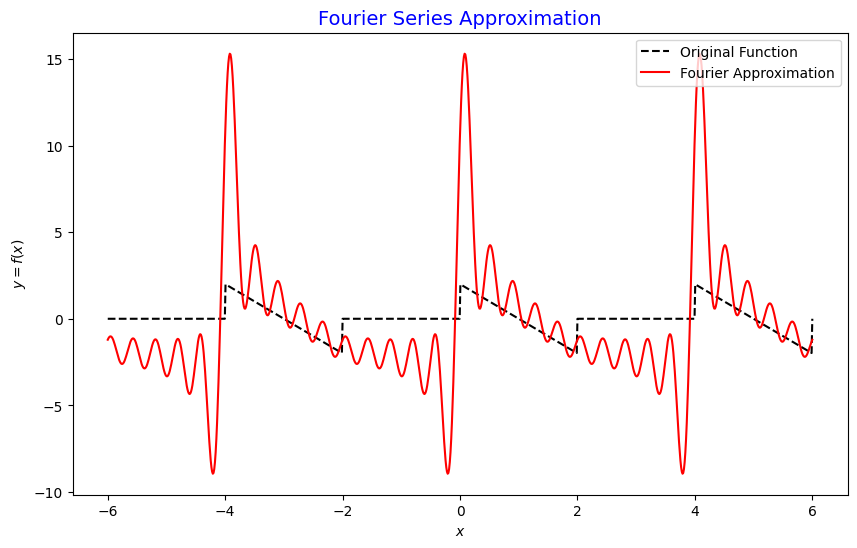

In [47]:
x = np.linspace(-6,6,1000)
n_terms = 10

plt.figure(figsize=(10,6))
plt.title("Fourier Series Approximation",color='blue',fontsize="14")
plt.plot(x,g(x),label='Original Function', color = 'black', linestyle = '--')
plt.plot(x, fourier(x,n_terms), label='Fourier Approximation', color='red')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.show()

### Author : Subhash Bhandari
https://www.cosubhasmos.rf.gd
